In [1]:
import pandas as pd
import datetime as dt

# Define the start and end dates
start = dt.datetime(2021, 7, 1)
end = dt.datetime(2021, 12, 28)

# Load the CSV file and set 'Date' as the index
data = pd.read_csv('Tatacoffee13_21.csv', parse_dates=['Date'], index_col='Date')

# Filter the data based on the index
stk_data = data[(data.index >= start) & (data.index <= end)]

# Display the filtered data
print(stk_data)

              Open    High     Low   Close
Date                                      
2021-07-01  188.60  189.00  183.00  184.55
2021-07-02  183.05  187.50  182.15  186.40
2021-07-05  187.85  198.35  187.85  192.45
2021-07-06  193.80  194.80  187.35  188.80
2021-07-07  187.80  193.95  185.40  192.85
...            ...     ...     ...     ...
2021-12-22  202.90  207.80  201.35  205.00
2021-12-23  206.00  206.85  202.05  202.95
2021-12-24  203.90  203.90  199.35  201.00
2021-12-27  200.00  222.00  196.00  218.35
2021-12-28  219.65  220.45  211.55  212.35

[123 rows x 4 columns]


In [2]:
stk_data

,Open,High,Low,Close
Date,,,,
2021-07-01,188.60,189.00,183.00,184.55
2021-07-02,183.05,187.50,182.15,186.40
2021-07-05,187.85,198.35,187.85,192.45
2021-07-06,193.80,194.80,187.35,188.80
2021-07-07,187.80,193.95,185.40,192.85
...,...,...,...,...
2021-12-22,202.90,207.80,201.35,205.00
2021-12-23,206.00,206.85,202.05,202.95
2021-12-24,203.90,203.90,199.35,201.00


In [3]:
stk_data.index

DatetimeIndex(['2021-07-01', '2021-07-02', '2021-07-05', '2021-07-06',
               '2021-07-07', '2021-07-08', '2021-07-09', '2021-07-12',
               '2021-07-13', '2021-07-14',
               ...
               '2021-12-15', '2021-12-16', '2021-12-17', '2021-12-20',
               '2021-12-21', '2021-12-22', '2021-12-23', '2021-12-24',
               '2021-12-27', '2021-12-28'],
              dtype='datetime64[ns]', name='Date', length=123, freq=None)

In [4]:
column="Close"

In [5]:
from sklearn.preprocessing import MinMaxScaler
Ms = MinMaxScaler()
data1= Ms.fit_transform(stk_data[[column]])
print("Len:",data1.shape)

Len: (123, 1)


In [6]:
training_size = round(len(data1 ) * 0.80)
print(training_size)
X_train=data1[:training_size]
X_test=data1[training_size:]
print("X_train length:",X_train.shape)
print("X_test length:",X_test.shape)
y_train=data1[:training_size]
y_test=data1[training_size:]
print("y_train length:",y_train.shape)
print("y_test length:",y_test.shape)

98
X_train length: (98, 1)
X_test length: (25, 1)
y_train length: (98, 1)
y_test length: (25, 1)


In [7]:
import numpy as np
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.ar_model import AutoReg #algo
from stockFunctions import rmsemape
# Example of your loop (adjust to  data)
trends = ['n', 't', 'c', 'ct']
lags = [1, 2, 3, 4]

for i in lags:
    for td in trends:
        model = AutoReg(X_train, lags=i, trend=td)
        model_fit = model.fit()
        
        # Make prediction
        y_pred = model_fit.predict(len(X_train), len(data1) - 1)
        
        # Evaluate using rmsemape
        print(f"Lag={i}, Trend={td}")
        rmsemape(y_test, y_pred)
        print("************")

Lag=1, Trend=n
RMSE-Testset: 0.14697833103051713
maPe-Testset: 0.2996233676581957
************
Lag=1, Trend=t
RMSE-Testset: 0.4527171307719577
maPe-Testset: 1.0040447397480232
************
Lag=1, Trend=c
RMSE-Testset: 0.14430244276422033
maPe-Testset: 0.29967659862124846
************
Lag=1, Trend=ct
RMSE-Testset: 0.31746179789405826
maPe-Testset: 0.7089714522623052
************
Lag=2, Trend=n
RMSE-Testset: 0.1475578983263811
maPe-Testset: 0.30117919787414066
************
Lag=2, Trend=t
RMSE-Testset: 0.462279364788536
maPe-Testset: 1.027139930441284
************
Lag=2, Trend=c
RMSE-Testset: 0.1426467437133936
maPe-Testset: 0.29649421032978124
************
Lag=2, Trend=ct
RMSE-Testset: 0.3249526756000255
maPe-Testset: 0.7272668466791423
************
Lag=3, Trend=n
RMSE-Testset: 0.17400158804029786
maPe-Testset: 0.365595357275859
************
Lag=3, Trend=t
RMSE-Testset: 0.45770841309299165
maPe-Testset: 1.01763904258657
************
Lag=3, Trend=c
RMSE-Testset: 0.1509596370778762
maPe-Te

#below without stock funtion module 

In [ ]:
#import numpy as np
#from sklearn.metrics import mean_squared_error
#from statsmodels.tsa.ar_model import AutoReg

# I have problem on this module so Define rmsemape directly in the notebook
#def rmsemape(y_true, y_pred):
    rmse = np.sqrt(np.mean((y_true - y_pred) ** 2))
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print(f"RMSE: {rmse:.4f}")
    print(f"MAPE: {mape:.4f}%")

# Example of your loop (adjust to  data)
trends = ['n', 't', 'c', 'ct']
lags = [1, 2, 3, 4]

#for i in lags:
    for td in trends:
        model = AutoReg(X_train, lags=i, trend=td)
        model_fit = model.fit()
        
        # Make prediction
        y_pred = model_fit.predict(len(X_train), len(data1) - 1)
        
        # Evaluate using rmsemape
        print(f"Lag={i}, Trend={td}")
        rmsemape(y_test, y_pred)
        print("************")

In [8]:
len(y_pred)

25

In [9]:

from sklearn.metrics import mean_squared_error
from statsmodels.tsa.ar_model import AutoReg
from stockFunctions import rmsemape

# Example of setting the lag and trend
i = 1
td = 'ct'

# Assuming X_train and y_test are already defined
model = AutoReg(X_train, lags=i, trend=td)
model_fit = model.fit()

# Make prediction
y_pred = model_fit.predict(len(X_train), len(data1) - 1)

# Calculate MSE and RMSE
mse = mean_squared_error(y_test, y_pred, squared=False)

# Print out the results
print("Lag={}, Trend={}".format(i, td))
rmsemape(y_test, y_pred)  # Call the rmsemape function
print("************")

Lag=1, Trend=ct
RMSE-Testset: 0.31746179789405826
maPe-Testset: 0.7089714522623052
************


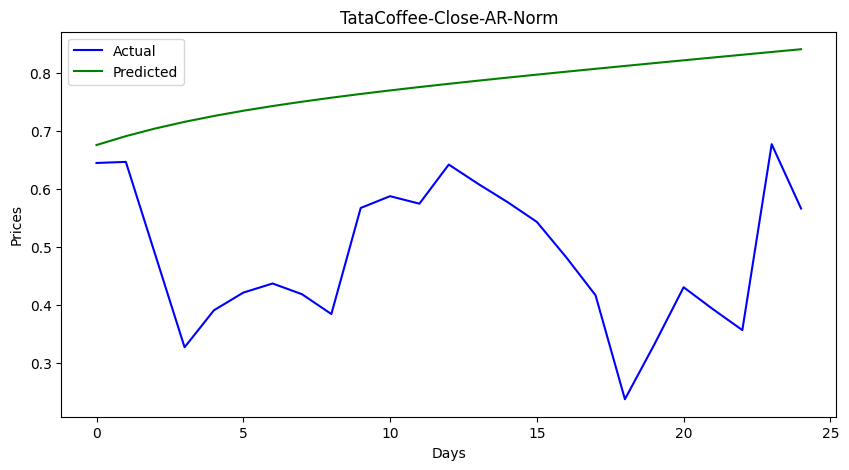

In [11]:
from stockFunctions import graph
graph(y_test,y_pred,"Actual","Predicted","TataCoffee-Close-AR-Norm","Days","Prices")

In [12]:
len(data1)

123

In [13]:
y_test

array([[0.64510166],
       [0.64695009],
       [0.487061  ],
       [0.3271719 ],
       [0.3909427 ],
       [0.42144177],
       [0.43715342],
       [0.41866913],
       [0.3844732 ],
       [0.56746765],
       [0.58780037],
       [0.57486137],
       [0.64232902],
       [0.6090573 ],
       [0.57763401],
       [0.54343808],
       [0.48243993],
       [0.4168207 ],
       [0.23752311],
       [0.33179298],
       [0.43068392],
       [0.39279113],
       [0.35674677],
       [0.67744917],
       [0.56654344]])

In [15]:
from stockFunctions import conversionSingle
aTestNormTable=conversionSingle(y_test,[column])

In [16]:
aTestNormTable

,Close
0,0.645102
1,0.64695
2,0.487061
3,0.327172
4,0.390943
5,0.421442
6,0.437153
7,0.418669
8,0.384473
9,0.567468


In [17]:
actual_stock_price_test_ori=Ms.inverse_transform(aTestNormTable)

In [18]:
actual_stock_price_test_ori

array([[216.6 ],
       [216.7 ],
       [208.05],
       [199.4 ],
       [202.85],
       [204.5 ],
       [205.35],
       [204.35],
       [202.5 ],
       [212.4 ],
       [213.5 ],
       [212.8 ],
       [216.45],
       [214.65],
       [212.95],
       [211.1 ],
       [207.8 ],
       [204.25],
       [194.55],
       [199.65],
       [205.  ],
       [202.95],
       [201.  ],
       [218.35],
       [212.35]])

In [19]:
actual_stock_price_test_oriA=conversionSingle(actual_stock_price_test_ori,[column])

In [20]:
actual_stock_price_test_oriA

,Close
0,216.6
1,216.7
2,208.05
3,199.4
4,202.85
5,204.5
6,205.35
7,204.35
8,202.5
9,212.4


In [21]:
from stockFunctions import conversionSingle
aTestNormTable=conversionSingle(y_test,[column])
actual_stock_price_test_ori=Ms.inverse_transform(aTestNormTable)
actual_stock_price_test_oriA=conversionSingle(actual_stock_price_test_ori,[column])

In [22]:
from stockFunctions import conversionSingle
pTestNormTable=conversionSingle(y_pred,[column])
predicted_stock_price_test_ori=Ms.inverse_transform(pTestNormTable)
predicted_stock_price_test_oriP=conversionSingle(predicted_stock_price_test_ori,[column])

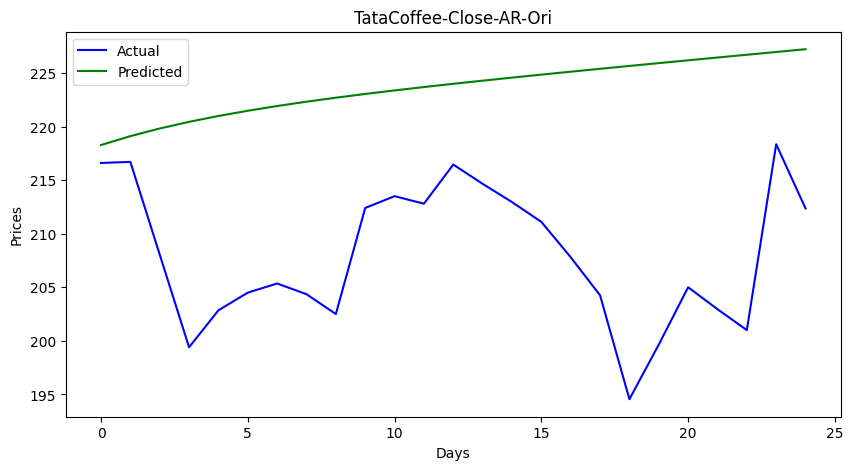

In [23]:
from stockFunctions import graph
graph(actual_stock_price_test_oriA,predicted_stock_price_test_oriP,"Actual","Predicted","TataCoffee-Close-AR-Ori","Days","Prices")

In [24]:
from stockFunctions import rmsemape
rmsemape(actual_stock_price_test_oriA,predicted_stock_price_test_oriP)

RMSE-Testset: 17.174683266068563
maPe-Testset: 0.07612161180375927


In [25]:
forecast=model_fit.predict(len(data1), len(data1)+3)

In [26]:
forecast

array([0.84606549, 0.85079937, 0.85552548, 0.86024539])

In [27]:
from stockFunctions import conversionSingle
fTestNormTable=conversionSingle(forecast,["Closefore"])
forecast_stock_price_test_ori=Ms.inverse_transform(fTestNormTable)
forecast_stock_price_test_oriF=conversionSingle(forecast_stock_price_test_ori,["Closefore"])

In [28]:
forecast_stock_price_test_oriF

,Closefore
0,227.472143
1,227.728246
2,227.983929
3,228.239276


In [29]:
forecast_stock_price_test_oriF.to_csv("CloseAR.csv",index=False)